# Murders
## Trend estimation of the number of murders in the United States of America for the years 1985 to 1995

### Libraries

In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib
import seaborn as sns
from scipy.stats import linregress
from functools import reduce

In [2]:
sns.set()
sns.set_style("white")
sns.set_context("talk")
matplotlib.pyplot.rc("axes.spines", top=False, right=False, bottom=False, left=False)
matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)

### Actual Data

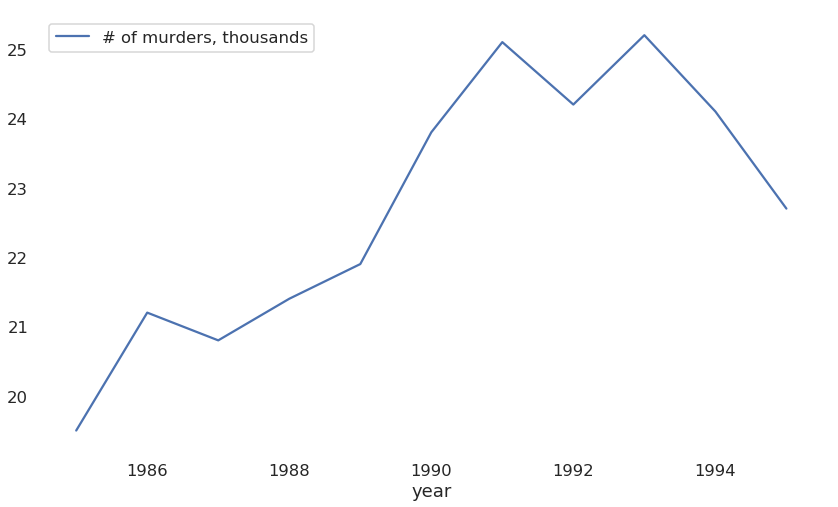

In [3]:
d = {'year': range(1985, 1996), 
     '# of murders, thousands': [19.5, 21.2, 20.8, 21.4, 21.9, 23.8, 25.1, 24.2, 25.2, 24.1, 22.7]}
df = pd.DataFrame(data = d)
df.plot(x='year')

### 1 Least Squares

#### 1.1 Linear Regression

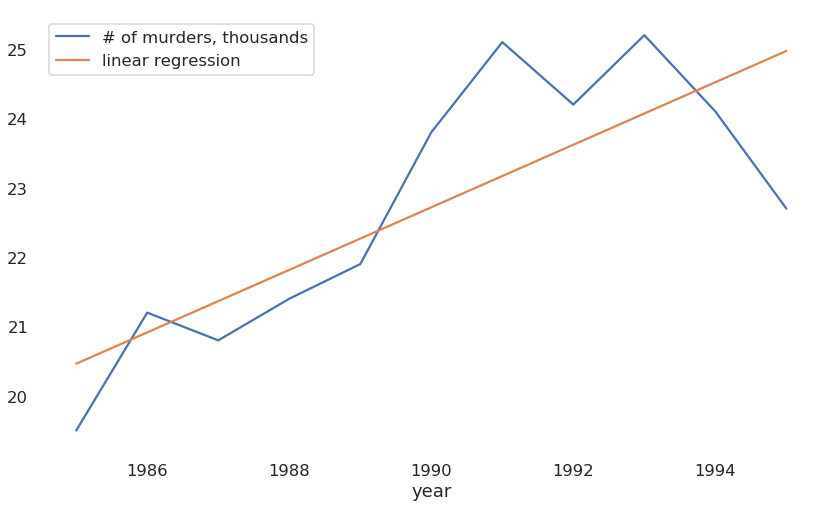

In [4]:
df_lr = df.copy()
slope, intercept, _, _, _ = linregress(df['year'], df['# of murders, thousands'])
df_lr['linear regression'] = intercept + slope * df['year']
df_lr.plot(x='year')

#### 1.2 Polynomial Regression

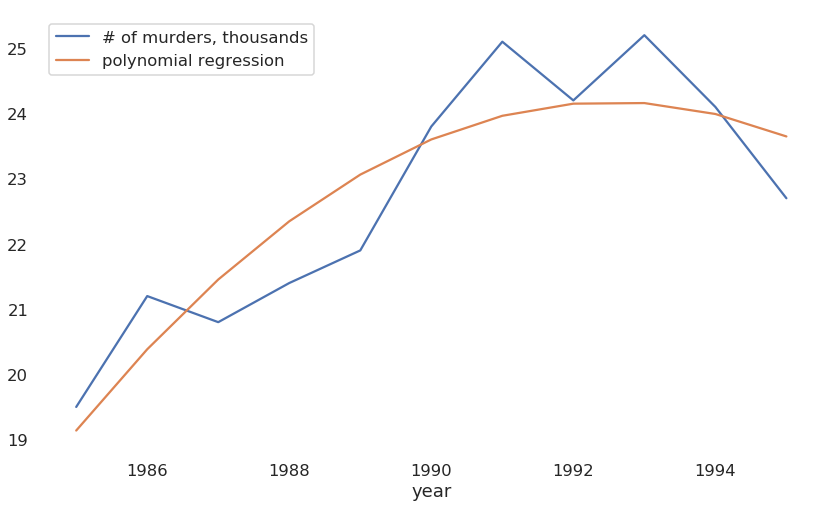

In [5]:
df_pr = df.copy()
coefs = poly.polyfit(df['year'], df['# of murders, thousands'], 2)
df_pr['polynomial regression'] = poly.polyval(df['year'], coefs)
df_pr.plot(x='year')

#### 1.3 All Regressions

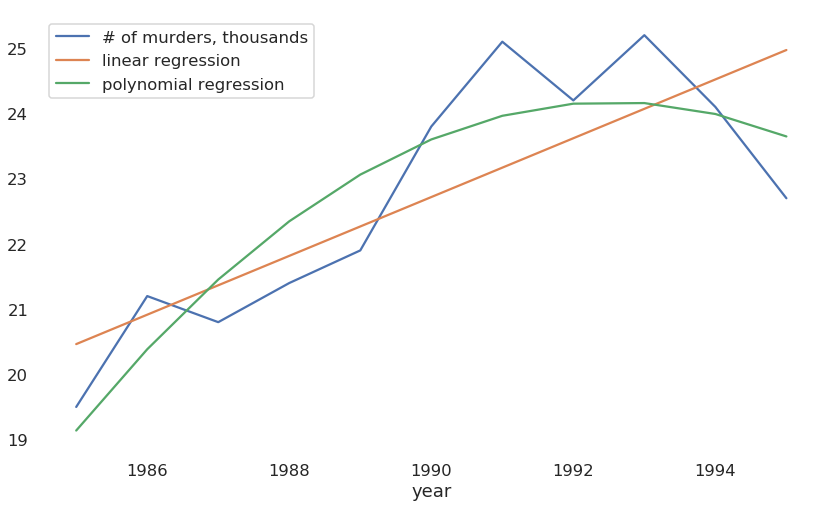

In [6]:
dfs = [df, df_lr, df_pr]
dfs_r = reduce(lambda left,right: pd.merge(left,right,on=['year', '# of murders, thousands']), dfs)
dfs_r.plot(x='year')

### 2 Moving Averages

#### 2.1 Simple Moving Averages

##### 2.1.1 4-Year Moving Average

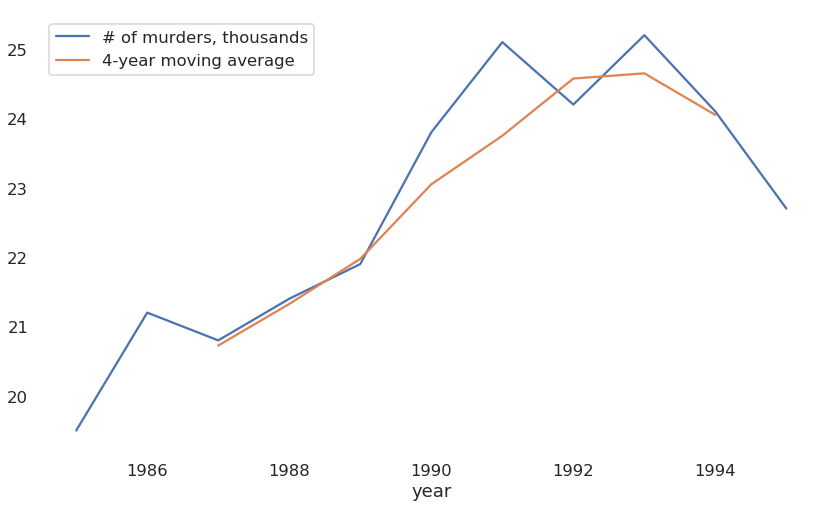

In [7]:
df_ma4 = df.copy()
df_ma4['4-year moving average'] = df['# of murders, thousands'].rolling(4).mean()
df_ma4['4-year moving average'] = df_ma4['4-year moving average'].shift(-1)
df_ma4.plot(x='year')

##### 2.1.2 4-Year Central Moving Average

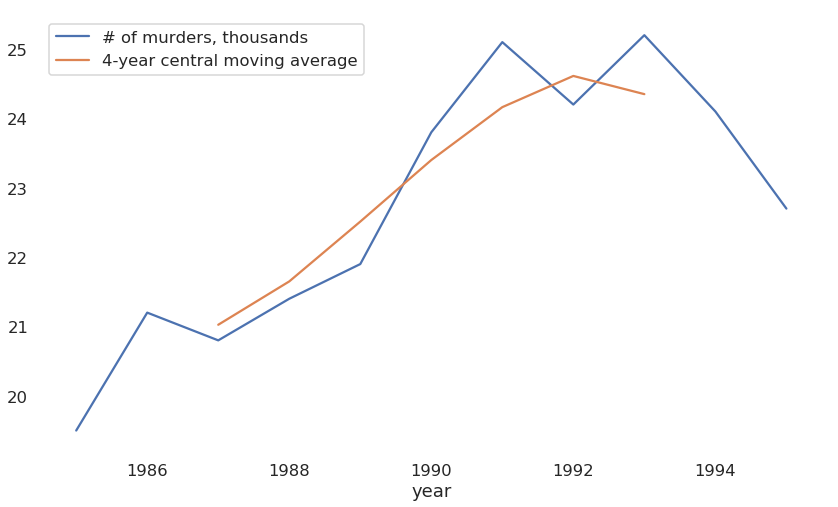

In [8]:
df_cma4 = df.copy()
df_cma4['4-year central moving average'] = df_ma4['4-year moving average'].rolling(2).mean()
df_cma4['4-year central moving average'] = df_cma4['4-year central moving average'].shift(-1)
df_cma4.plot(x='year')

##### 2.1.3 5-Year Moving Average

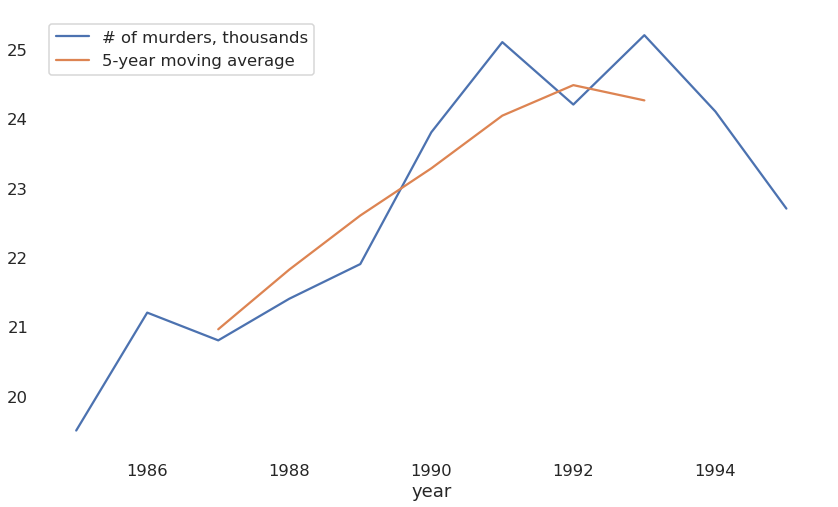

In [9]:
df_ma5 = df.copy()
df_ma5['5-year moving average'] = df['# of murders, thousands'].rolling(5).mean()
df_ma5['5-year moving average'] = df_ma5['5-year moving average'].shift(-2)
df_ma5.plot(x='year')

##### 2.1.4 All Simple Moving Averages

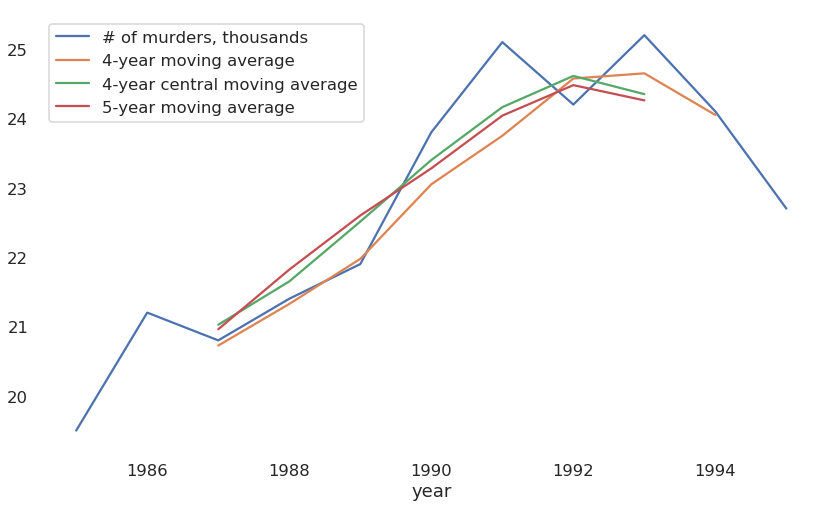

In [10]:
dfs = [df, df_ma4, df_cma4, df_ma5]
dfs_sma = reduce(lambda left,right: pd.merge(left,right,on=['year', '# of murders, thousands']), dfs)
dfs_sma.plot(x='year')

#### 2.2 Weighted Moving Averages

##### 2.2.1 5-Year Weighted Moving Average

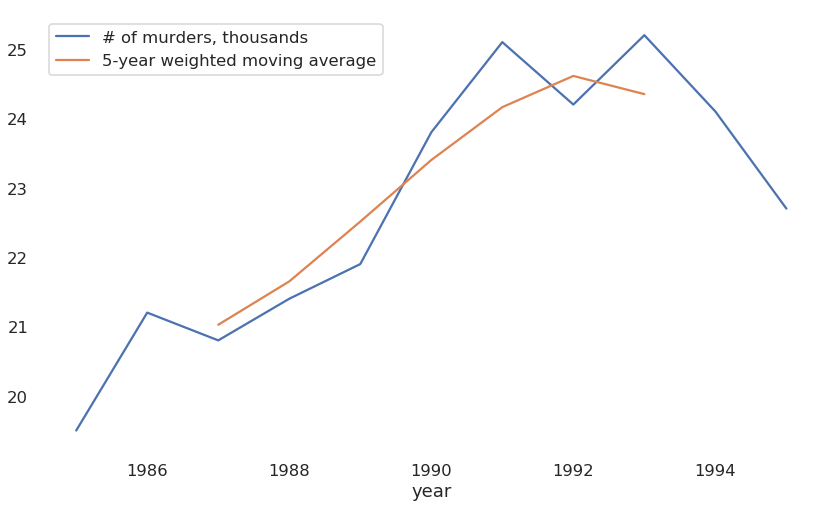

In [11]:
weights = np.array([1, 2, 2, 2, 1])
df_wma5 = df.copy()

def f(w):                        
    def g(x):
        return sum(w*x) / sum(w)
    return g

df_wma5['5-year weighted moving average'] = df_wma5['# of murders, thousands'].rolling(window=weights.shape[0]).apply(f(weights), raw='False')
df_wma5['5-year weighted moving average'] = df_wma5['5-year weighted moving average'].shift(-2)
df_wma5.plot(x='year')

##### 2.2.2 Exponentially Weighted Moving Average

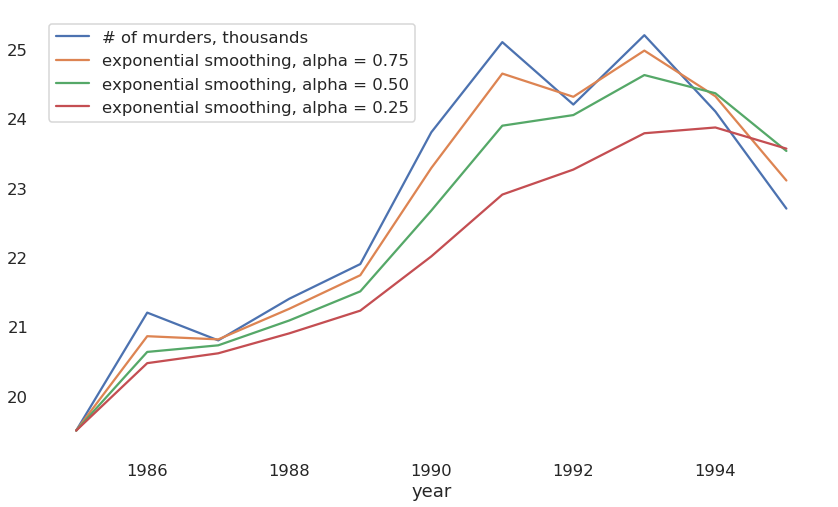

In [12]:
df_ewma = df.copy()
df_ewma['exponential smoothing, alpha = 0.75'] = df['# of murders, thousands'].ewm(alpha=0.75).mean()
df_ewma['exponential smoothing, alpha = 0.50'] = df['# of murders, thousands'].ewm(alpha=0.50).mean()
df_ewma['exponential smoothing, alpha = 0.25'] = df['# of murders, thousands'].ewm(alpha=0.25).mean()
df_ewma.plot(x='year')

##### 2.2.3 All Weighted Moving Averages

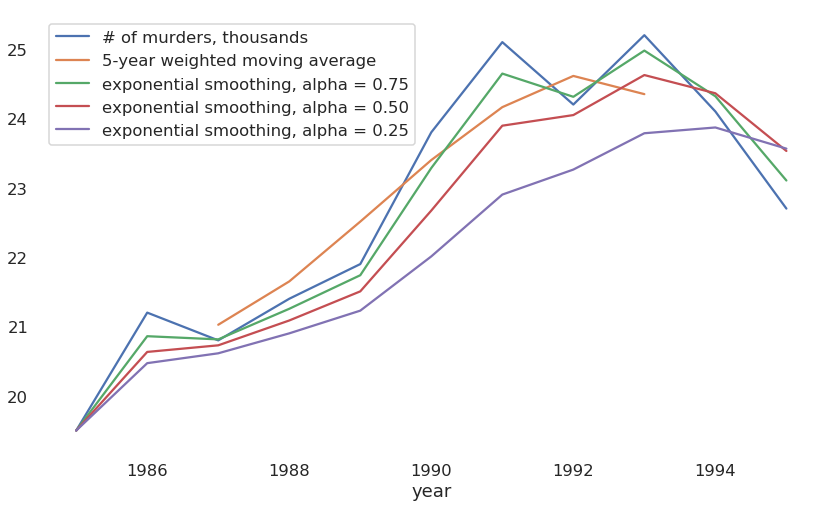

In [13]:
dfs = [df, df_wma5, df_ewma]
dfs_sma = reduce(lambda left,right: pd.merge(left,right,on=['year', '# of murders, thousands']), dfs)
dfs_sma.plot(x='year')

#### 2.3 All Moving Averages

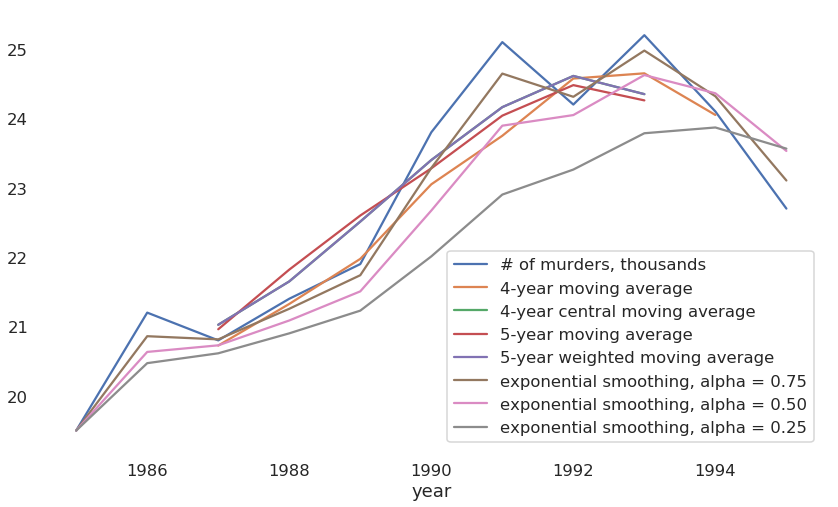

In [14]:
dfs = [df, df_ma4, df_cma4, df_ma5, df_wma5, df_ewma]
dfs_ma = reduce(lambda left,right: pd.merge(left,right,on=['year', '# of murders, thousands']), dfs)
dfs_ma.plot('year')

### 3 Semiaverages

#### 3.1 Semiaverage by mean

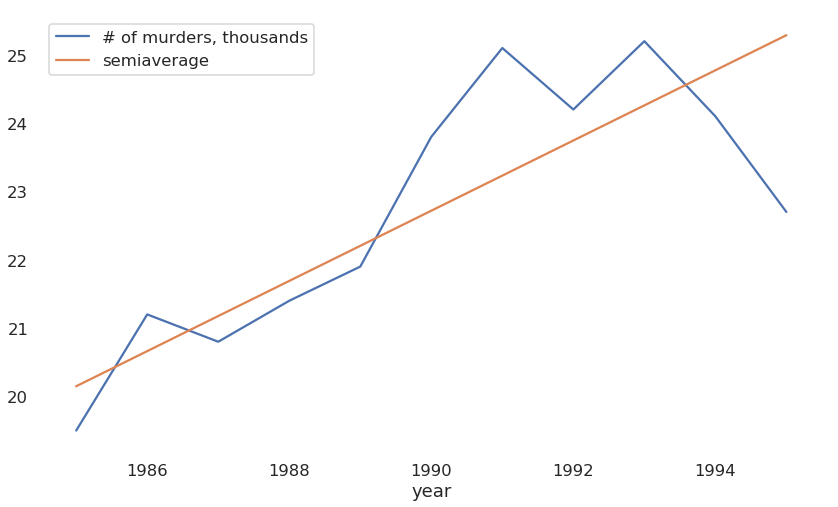

In [15]:
df_s_mean = df.copy()
df1 = df_s_mean.iloc[:6,]
df2 = df_s_mean.iloc[6:,]
point1 = (df1['year'].mean(), df1['# of murders, thousands'].mean()) 
point2 = (df2['year'].mean(), df2['# of murders, thousands'].mean()) 
slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
intercept = point2[1] - slope * point2[0]
df_s_mean['semiaverage'] = intercept + slope * df['year']
df_s_mean.plot(x='year')

#### 3.2 Semiaverage by median

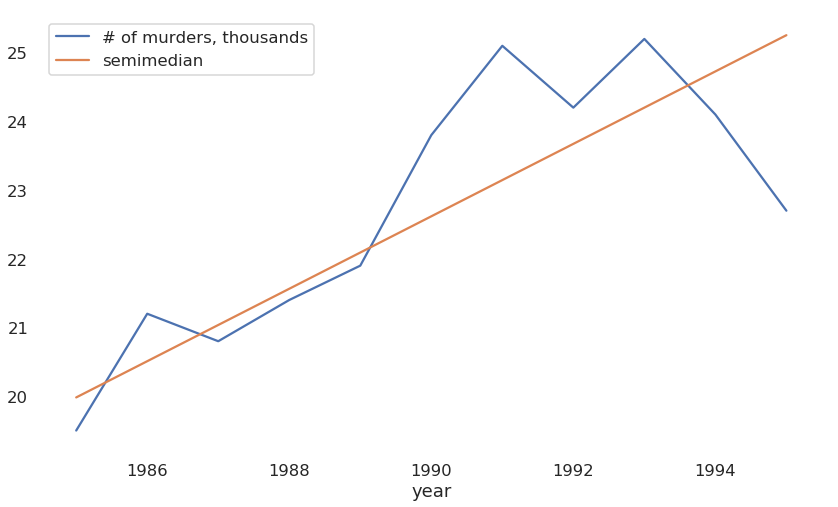

In [16]:
df_s_median = df.copy()
df1 = df_s_median.iloc[:6,]
df2 = df_s_median.iloc[6:,]
point1 = (df1['year'].median(), df1['# of murders, thousands'].median()) 
point2 = (df2['year'].median(), df2['# of murders, thousands'].median()) 
slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
intercept = point2[1] - slope * point2[0]
df_s_median['semimedian'] = intercept + slope * df['year']
df_s_median.plot(x='year')

#### 3.3 All Semiaverages

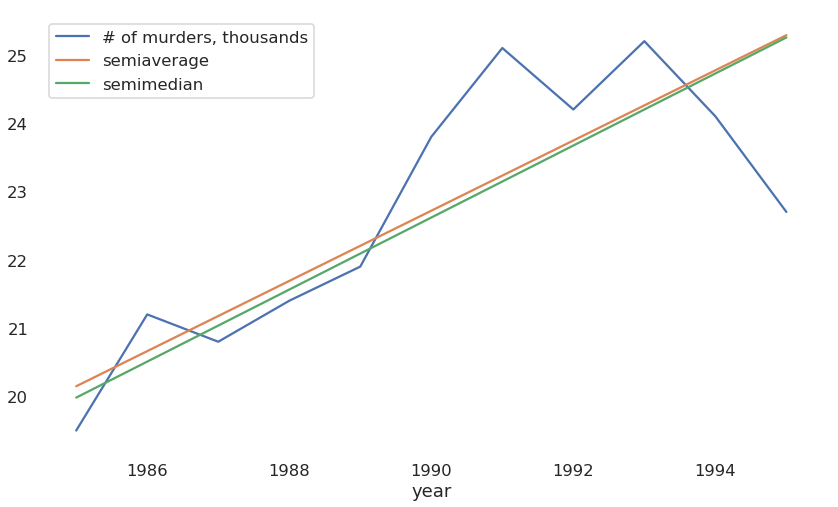

In [17]:
dfs = [df, df_s_mean, df_s_median]
dfs_s = reduce(lambda left,right: pd.merge(left,right,on=['year', '# of murders, thousands']), dfs)
dfs_s.plot(x='year')

### 4 All Estimations

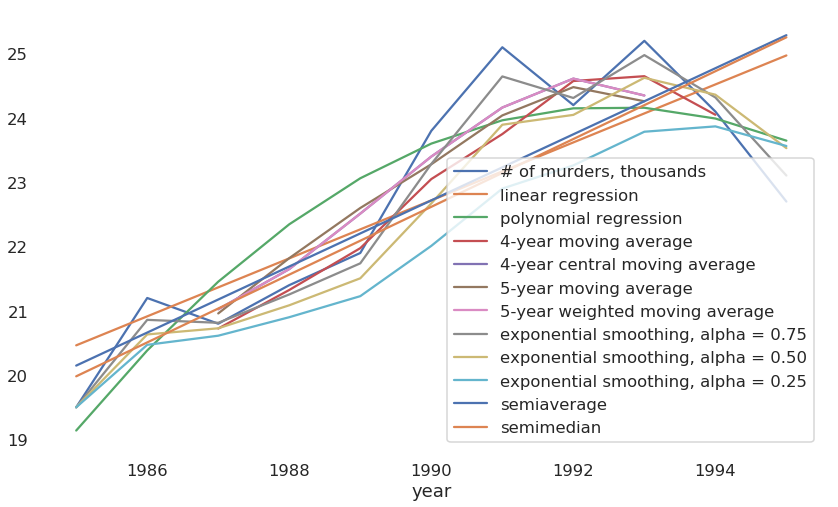

In [18]:
dfs = [df, dfs_r, dfs_ma, dfs_s]
dfs_t = reduce(lambda left,right: pd.merge(left,right,on=['year', '# of murders, thousands']), dfs)
dfs_t.plot(x='year')